In [1]:
import numpy as np
import cv2
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

%matplotlib inline

In [54]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

In [55]:
XIMG_NAME = 'x.JPG'
ximg = cv2.imread(XIMG_NAME)

In [56]:
frame = ximg
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, idx, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, idx)
arucox = {}
for i in range(idx.shape[0]):
    arucox[idx[i][0]] = corners[i]

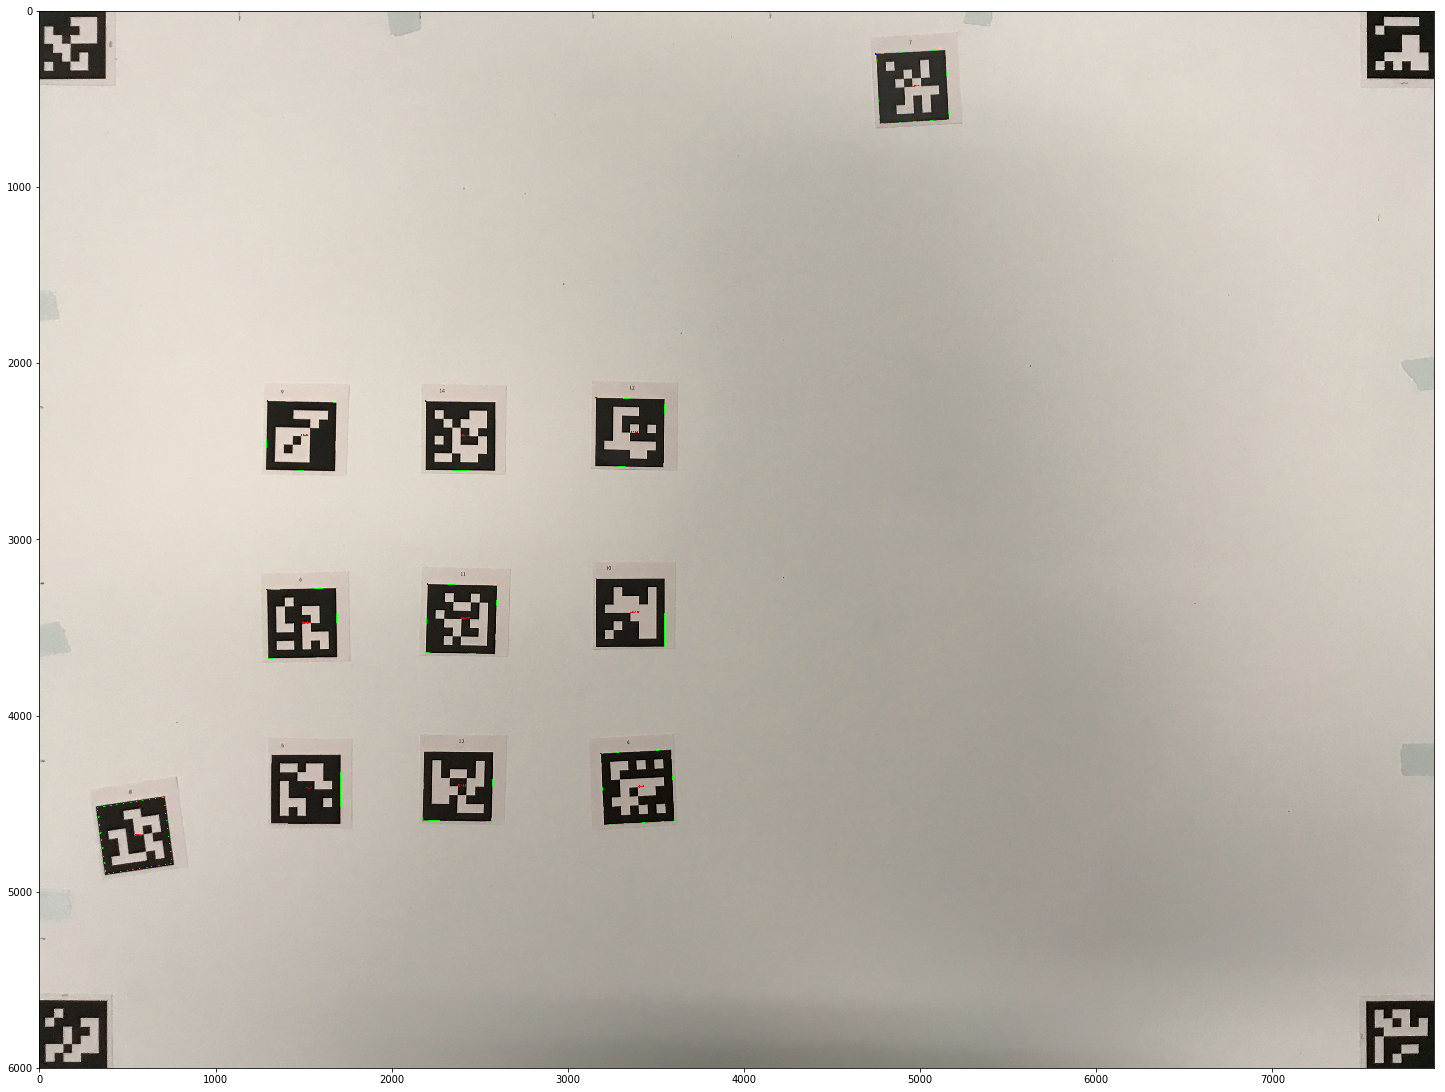

In [64]:
plt.figure(figsize=(25,25))
plt.imshow(frame_markers)
plt.show()

In [58]:
corner = [0,1,2,3]
tl_x = arucox[0][0][0]
tr_x = arucox[1][0][0]
bl_x = arucox[3][0][0]
br_x = arucox[2][0][0]

In [59]:
H = 6000#7590#10990
W = 7920#5590#7905
rows,cols,ch = ximg.shape

pts1 = np.float32([tl_x,tr_x,br_x,bl_x])
pts2 = np.float32([[0,0],[W,0],[W,H],[0,H]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst1 = cv2.warpPerspective(ximg,M,(W,H))

In [63]:
frame = dst1
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
parameters =  aruco.DetectorParameters_create()
corners, idx, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, idx)
d1 = {}
for i in range(len(idx)):
    d1[idx[i][0]] = corners[i]

In [67]:
math.atan(-0.5)

-0.4636476090008061

In [68]:
math.atan(0.5)

0.4636476090008061

In [62]:
def angle(corner):
    theta = math.atan((corner[0][0]-corner[3][0])/(corner[0][1]-corner[3][1]))
    return theta
pos = {}
for i in d1:
    theta = angle(d1[i][0])
    print(i,d1[i][0][0],theta*180/math.pi, theta)
    pos[i] = str(d1[i][0][0][1]) + " " + str(d1[i][0][0][0]) + " " + str(theta)

8 [ 330. 4521.] 7.424893349971879 0.1295888355664409
13 [2187. 4203.] -1.4650458448219759 -0.025569873684805396
11 [2206. 3252.] -1.619757532343872 -0.02827010202337911
14 [2196. 2213.] -0.145790473394443 -0.0025445237787742243
7 [4752.  243.] 3.03556921535338 0.052980677480097285
5 [1320. 4221.] -0.5861256304716932 -0.010229822082058651
4 [3190. 4214.] 2.544804441352965 0.044415216320984184
6 [1294. 3284.] 1.025646107616697 0.017900901538175452
10 [3163. 3223.] -0.14805078423951273 -0.002583973645139226
9 [1296. 2213.] -1.1751332738924254 -0.020509944779163142
12 [3162. 2195.] -0.740214344109225 -0.01291917747519627


In [44]:
def angle(corner):
    theta = math.atan((corner[0][0]-corner[3][0])/(corner[0][1]-corner[3][1]))
    return theta
pos = {}
for i in d1:
    theta = angle(d1[i][0])
    print(i,d1[i][0][0],theta*180/math.pi, theta)
    pos[i] = str(d1[i][0][0][1]) + " " + str(d1[i][0][0][0]) + " " + str(theta)

5 [1330. 4228.] -0.15117585461979283 -0.0026385164126316654
13 [2191. 4203.] -1.468800733528417 -0.025635408855778745
4 [3193. 4216.] 2.563770205106308 0.04474623134363541
6 [1304. 3291.] 1.2124280532581289 0.021160861472899514
7 [4757.  259.] 3.0127875265890025 0.052583062001994293
8 [ 337. 4523.] 7.9999834541165535 0.13962605137940257
11 [2210. 3255.] -1.7714697389349046 -0.03091797954385847
10 [3163. 3227.] 0.14843432614234808 0.0025906677141630673
14 [2199. 2220.] -0.2953364448704362 -0.005154593364123829
9 [1297. 2215.] -1.1721286113859792 -0.020457503525514432
12 [3161. 2199.] -0.590657196494908 -0.010308912829435255


In [52]:
##write file
filename = 'aruco.txt'
file = open(filename,'w')
for x in pos:
    txt = str(x) + ' ' + pos[x] + '\n'
    file.write(txt)
file.close()